In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

import warnings
warnings.filterwarnings('ignore')

In [2]:
#cd C:/UW/WI23/BIOSTAT557/Project/

C:\UW\WI23\BIOSTAT557\Project


In [3]:
df = pd.read_csv('Top100stocks_indicator.csv')
df

,TIMESTAMP,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,Typical Price,SMA,Mean Deviation,CCI,RSI,MACD,Signal,Histogram
0,23-07-2021,ZOMATO,116.00,138.90,115.00,126.00,125.30,76.00,694895290,8.625275e+10,2428917,126.633333,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,26-07-2021,ZOMATO,126.35,143.75,125.30,140.65,138.05,126.00,249723854,3.362032e+10,1034160,136.566667,NaN,NaN,NaN,NaN,1.168661,0.233732,0.934929
2,27-07-2021,ZOMATO,141.70,147.80,127.75,132.90,130.65,140.65,240341900,3.390968e+10,1075475,136.150000,NaN,NaN,NaN,NaN,1.452727,0.477531,0.975196
3,28-07-2021,ZOMATO,131.00,135.00,123.55,131.20,133.00,132.90,159793731,2.043701e+10,627048,129.916667,NaN,NaN,NaN,NaN,1.523118,0.686648,0.836469
4,29-07-2021,ZOMATO,134.95,144.00,132.20,141.55,142.25,131.20,117973089,1.624880e+10,489222,139.250000,NaN,NaN,NaN,NaN,2.386551,1.026629,1.359922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141586,26-12-2022,ACC,2372.00,2448.50,2360.00,2423.65,2429.15,2374.10,480611,1.165814e+09,33035,2410.716667,2532.664216,117.982771,-68.906981,28.940073,-1.850621,30.858689,-32.709310
141587,27-12-2022,ACC,2430.95,2487.95,2428.10,2478.00,2486.00,2423.65,260633,6.408237e+08,17590,2464.683333,2532.916667,117.570026,-38.690890,37.407735,-6.263760,23.434199,-29.697960
141588,28-12-2022,ACC,2475.00,2477.00,2447.55,2455.35,2456.00,2478.00,201331,4.953475e+08,10875,2459.966667,2534.337255,118.382656,-41.881466,33.905704,-11.456804,16.455999,-27.912803
141589,29-12-2022,ACC,2455.00,2467.70,2411.15,2447.85,2446.70,2455.35,352346,8.594227e+08,25719,2442.233333,2535.506863,119.860107,-51.879107,33.531613,-15.993157,9.966168,-25.959325


In [4]:
top_5 = ['RELIANCE','HDFCBANK','MARUTI','INFY','LT']

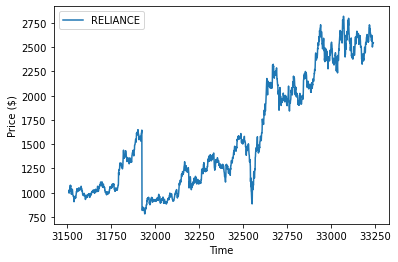

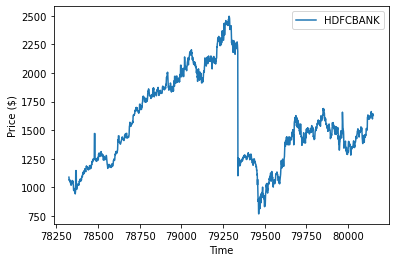

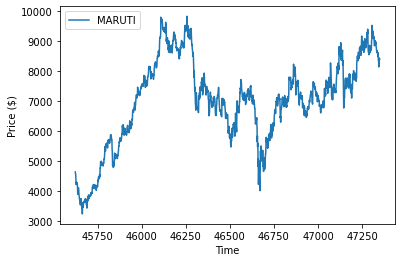

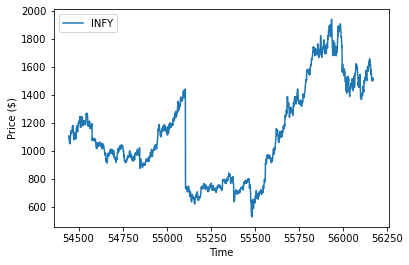

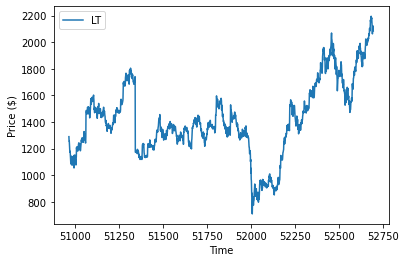

In [5]:
# Daily close price
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    plt.plot(x,label=i)
    plt.xlabel("Time")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()

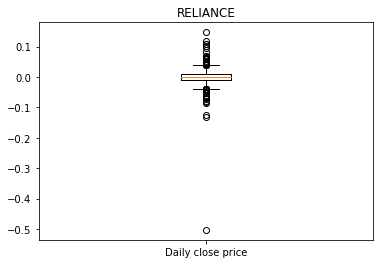

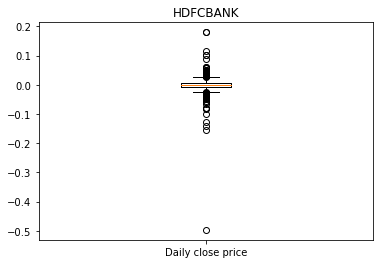

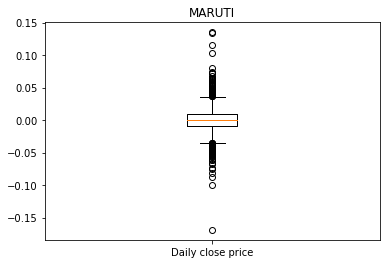

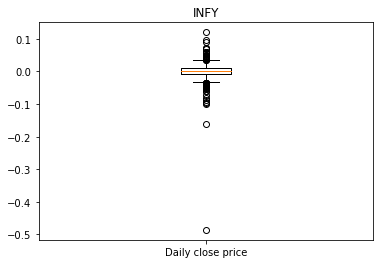

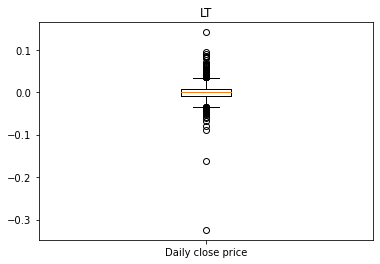

In [6]:
# Boxplot of returns
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    plt.title(i)
    returns = x.pct_change(1).dropna()
    plt.boxplot(returns,labels=["Daily close price"])
    plt.show()

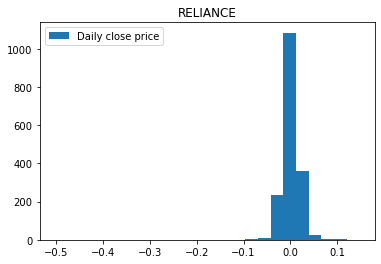

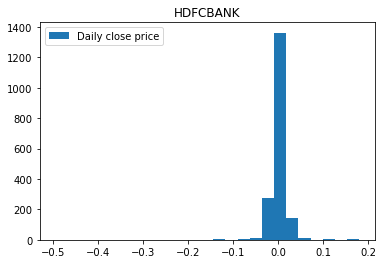

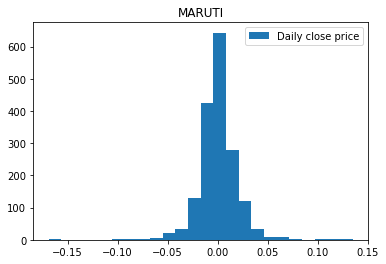

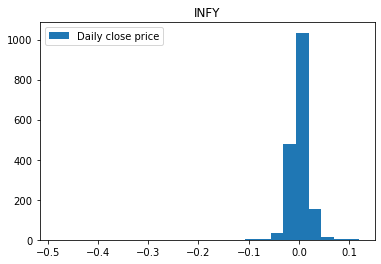

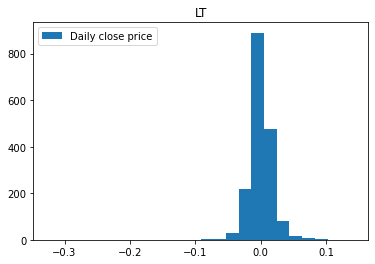

In [7]:
# Histogram of returns
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    plt.title(i)
    returns = x.pct_change(1).dropna()
    plt.hist(returns,bins="rice",label="Daily close price")
    plt.legend()
    plt.show()

In [8]:
# observables
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    print('\n>>>>>>>>>',i)
    returns = x.pct_change(1).dropna()
    print('MEAN:',np.mean(returns))
    print('STANDARD DEV:',np.std(returns))
    print('MEDIAN:',np.quantile(returns,0.5))
    print('SKEWNESS:',skew(returns))
    print('SKEW TEST:',skewtest(returns))
    print('KURTOSIS:',kurtosis(returns))
    print('KURTOSIS TEST:',kurtosistest(returns))


>>>>>>>>> RELIANCE
MEAN: 0.0008182229484384441
STANDARD DEV: 0.022193022826201964
MEDIAN: 0.0009390660878645374
SKEWNESS: -6.498281351549589
SKEW TEST: SkewtestResult(statistic=-38.72645742292833, pvalue=0.0)
KURTOSIS: 156.22022546003456
KURTOSIS TEST: KurtosistestResult(statistic=27.62823166540844, pvalue=5.0975898547378735e-168)

>>>>>>>>> HDFCBANK
MEAN: 0.0004661139814089777
STANDARD DEV: 0.020482232733529507
MEDIAN: 0.0
SKEWNESS: -7.481076050208144
SKEW TEST: SkewtestResult(statistic=-41.80425573135717, pvalue=0.0)
KURTOSIS: 200.49710203889026
KURTOSIS TEST: KurtosistestResult(statistic=28.944642300699076, pvalue=3.277666081966013e-184)

>>>>>>>>> MARUTI
MEAN: 0.0005260074361902946
STANDARD DEV: 0.0191126769875767
MEDIAN: 1.8310055149850513e-05
SKEWNESS: 0.12446819286896572
SKEW TEST: SkewtestResult(statistic=2.1133411461533473, pvalue=0.034571579383405625)
KURTOSIS: 9.28178880609201
KURTOSIS TEST: KurtosistestResult(statistic=17.30323671835043, pvalue=4.446882477023698e-67)

>>>>

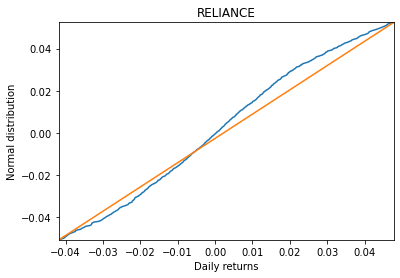

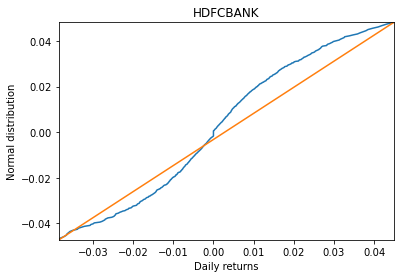

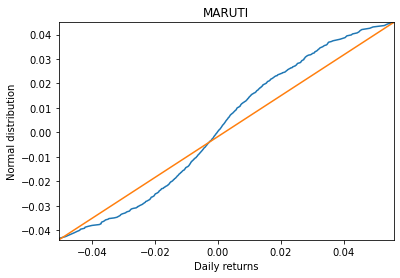

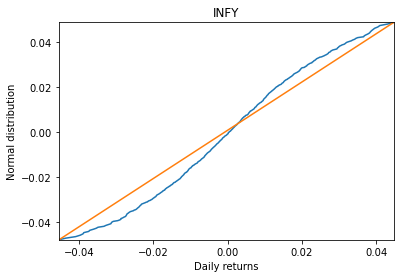

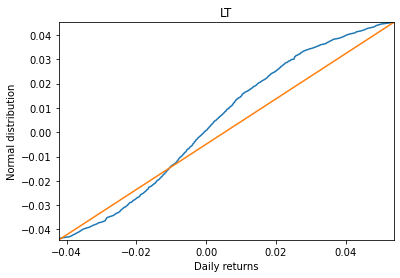

In [9]:
# Normal distribution check
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    plt.title(i)
    returns = x.pct_change(1).dropna()
    t = np.linspace(0.01,0.99,1000)
    q1 = np.quantile(returns,t)
    q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
    plt.plot(q1,q2)
    plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
    plt.xlim((min(q1),max(q1)))
    plt.ylim((min(q2),max(q2)))
    plt.xlabel("Daily returns")
    plt.ylabel("Normal distribution")
    plt.show()


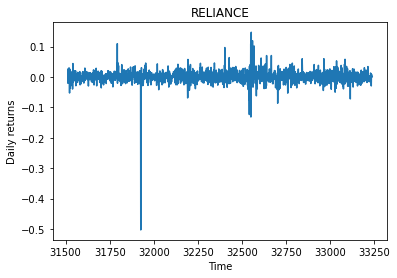

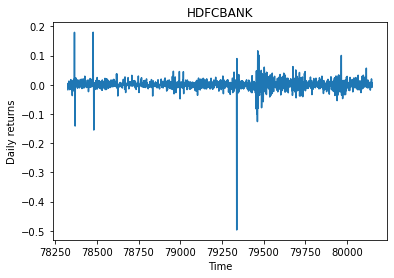

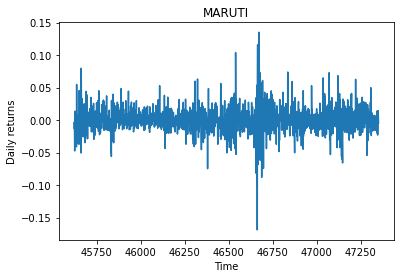

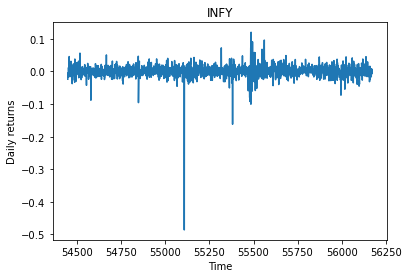

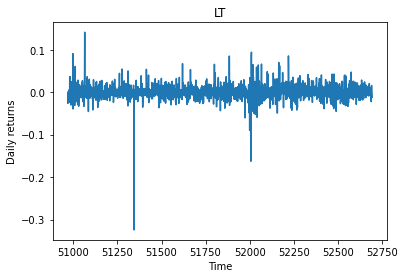

In [10]:
# Volatile Clustering
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    plt.title(i)
    returns = x.pct_change(1).dropna()
    plt.plot(returns)
    plt.xlabel("Time")
    plt.ylabel("Daily returns")
    plt.show()

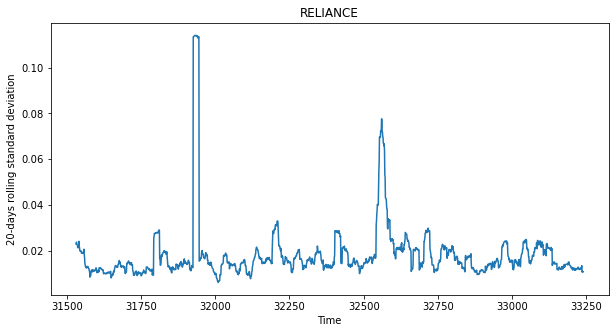

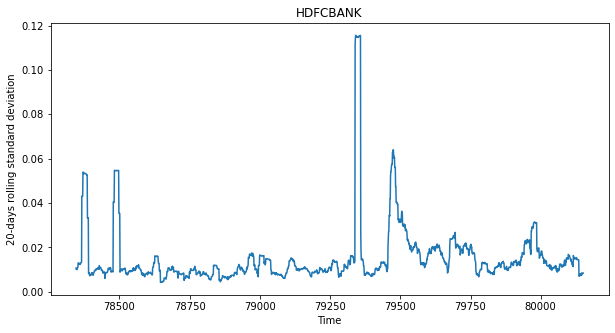

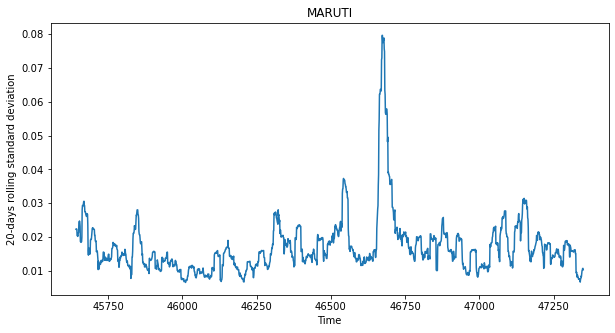

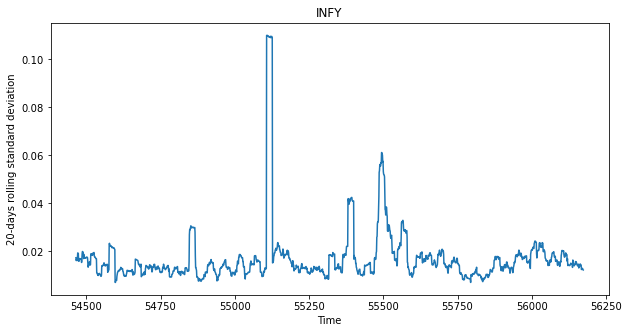

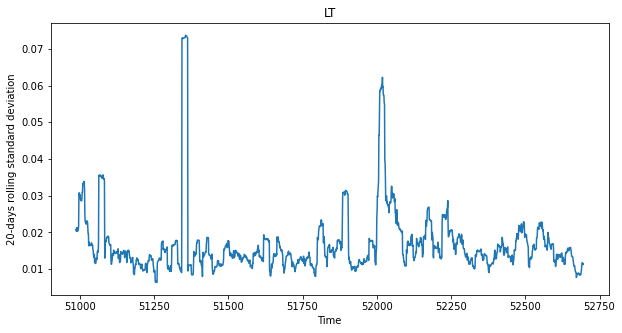

In [11]:
# 20-days rolling standard deviation
top_5 = ['RELIANCE','HDFCBANK','MARUTI','INFY','LT']
for i in top_5:
    dfr = df[df['SYMBOL'] == i]
    x = dfr['CLOSE']
    returns = x.pct_change(1).dropna()
    plt.figure(figsize=(10, 5))
    plt.title(i)
    plt.plot(returns.rolling(20).std())
    plt.xlabel("Time")
    plt.ylabel("20-days rolling standard deviation")
    plt.show()
    plt.close()


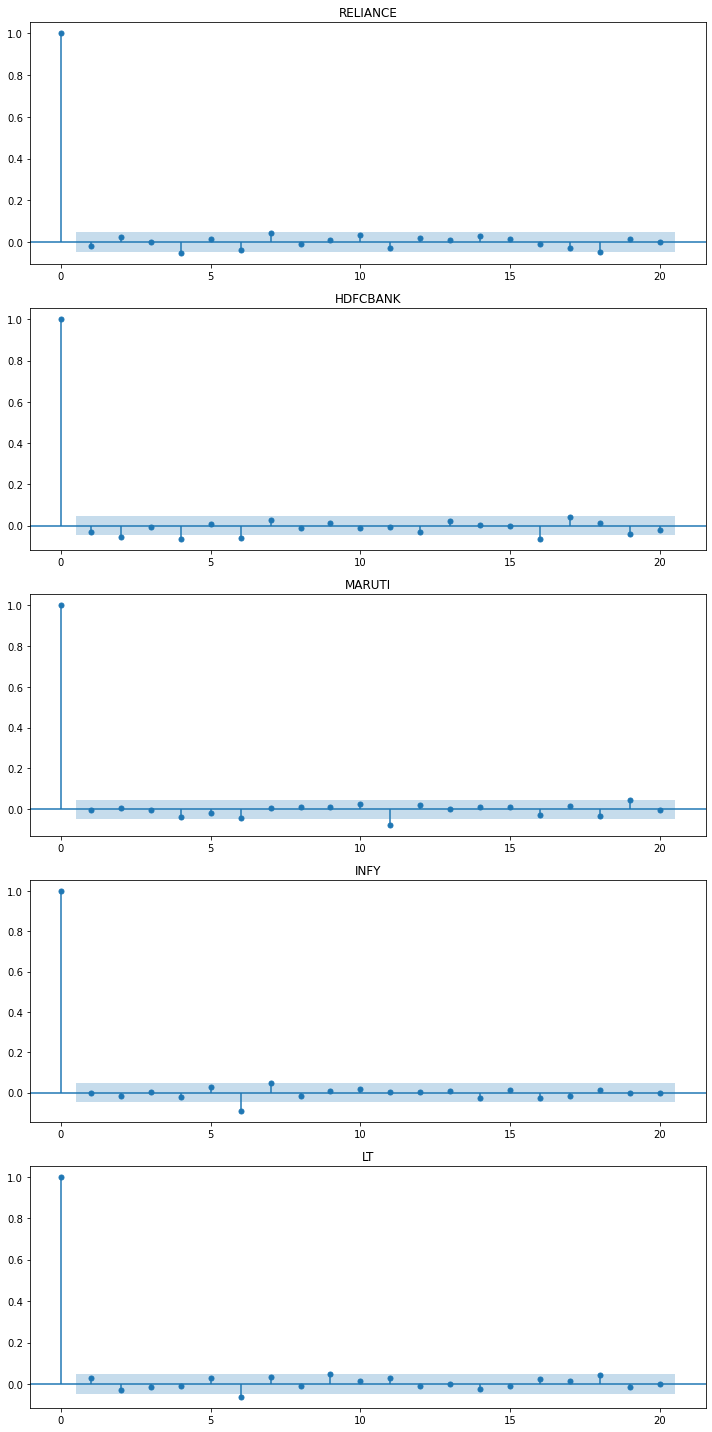

In [12]:
# Partial autocorrelation
fig, axs = plt.subplots(nrows=len(top_5), ncols=1, figsize=(10, 20))
for i, stock in enumerate(top_5):
    dfr = df[df['SYMBOL'] == stock]
    x = dfr['CLOSE']
    returns = x.pct_change(1).dropna()
    # Autocorrelation
    plot_pacf(returns, lags=20, ax=axs[i])
    axs[i].set_title(stock)
    
plt.tight_layout()
plt.show()
